In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.applications.efficientnet as efn
import tensorflow as tf
import zipfile

In [2]:
train_path = 'C:/Users/P M Shalini/Prasanna/go_train/'
valid_path = 'C:/Users/P M Shalini/Prasanna/go_valid/'
test_path = 'C:/Users/P M Shalini/Prasanna/go_test/'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=32)


Found 17640 images belonging to 15 classes.


In [3]:
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=32)

Found 5040 images belonging to 15 classes.


In [4]:

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=32, shuffle=False)

Found 2520 images belonging to 15 classes.


In [5]:
mobile = tf.keras.applications.mobilenet.MobileNet()


mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [6]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import DepthwiseConv2D
from tensorflow.keras.layers import Add
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Reshape, GlobalAveragePooling2D, Activation



In [24]:
x = mobile.layers[-5].output 


x = Dropout(0.5)(x)
# Add more Dense layers
x = Dense(512, activation='relu')(x)

x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Flatten()(x)
# Add the final Dense layer for classification
output = Dense(15, activation='softmax')(x)

# Create the model
model = Model(inputs=mobile.input, outputs=output)

In [26]:
for layer in model.layers[:-10]:
    layer.trainable = False
    print(layer.name)

input_1
conv1
conv1_bn
conv1_relu
conv_dw_1
conv_dw_1_bn
conv_dw_1_relu
conv_pw_1
conv_pw_1_bn
conv_pw_1_relu
conv_pad_2
conv_dw_2
conv_dw_2_bn
conv_dw_2_relu
conv_pw_2
conv_pw_2_bn
conv_pw_2_relu
conv_dw_3
conv_dw_3_bn
conv_dw_3_relu
conv_pw_3
conv_pw_3_bn
conv_pw_3_relu
conv_pad_4
conv_dw_4
conv_dw_4_bn
conv_dw_4_relu
conv_pw_4
conv_pw_4_bn
conv_pw_4_relu
conv_dw_5
conv_dw_5_bn
conv_dw_5_relu
conv_pw_5
conv_pw_5_bn
conv_pw_5_relu
conv_pad_6
conv_dw_6
conv_dw_6_bn
conv_dw_6_relu
conv_pw_6
conv_pw_6_bn
conv_pw_6_relu
conv_dw_7
conv_dw_7_bn
conv_dw_7_relu
conv_pw_7
conv_pw_7_bn
conv_pw_7_relu
conv_dw_8
conv_dw_8_bn
conv_dw_8_relu
conv_pw_8
conv_pw_8_bn
conv_pw_8_relu
conv_dw_9
conv_dw_9_bn
conv_dw_9_relu
conv_pw_9
conv_pw_9_bn
conv_pw_9_relu
conv_dw_10
conv_dw_10_bn
conv_dw_10_relu
conv_pw_10
conv_pw_10_bn
conv_pw_10_relu
conv_dw_11
conv_dw_11_bn
conv_dw_11_relu
conv_pw_11
conv_pw_11_bn
conv_pw_11_relu
conv_pad_12
conv_dw_12
conv_dw_12_bn
conv_dw_12_relu
conv_pw_12
conv_pw_12_bn
conv_pw

In [27]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [28]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.000080)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=20,
            verbose=2
)

Epoch 1/20
552/552 - 435s - loss: 2.4325 - accuracy: 0.2163 - val_loss: 1.7891 - val_accuracy: 0.4466 - 435s/epoch - 789ms/step
Epoch 2/20
552/552 - 438s - loss: 1.9058 - accuracy: 0.3718 - val_loss: 1.5345 - val_accuracy: 0.5079 - 438s/epoch - 794ms/step
Epoch 3/20
552/552 - 464s - loss: 1.7285 - accuracy: 0.4366 - val_loss: 1.4387 - val_accuracy: 0.5367 - 464s/epoch - 840ms/step
Epoch 4/20
552/552 - 484s - loss: 1.6451 - accuracy: 0.4600 - val_loss: 1.3896 - val_accuracy: 0.5448 - 484s/epoch - 877ms/step
Epoch 5/20
552/552 - 470s - loss: 1.5973 - accuracy: 0.4799 - val_loss: 1.3791 - val_accuracy: 0.5538 - 470s/epoch - 852ms/step
Epoch 6/20
552/552 - 454s - loss: 1.5567 - accuracy: 0.4934 - val_loss: 1.3387 - val_accuracy: 0.5619 - 454s/epoch - 822ms/step
Epoch 7/20
552/552 - 441s - loss: 1.5149 - accuracy: 0.5024 - val_loss: 1.3185 - val_accuracy: 0.5673 - 441s/epoch - 799ms/step
Epoch 8/20
552/552 - 476s - loss: 1.4949 - accuracy: 0.5070 - val_loss: 1.3023 - val_accuracy: 0.5768 - 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [14]:
test_labels = test_batches.classes

In [15]:
predictions = model.predict(x=test_batches)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate the testing accuracy
testing_accuracy = np.mean(predicted_labels == test_labels)

print("Testing Accuracy:", testing_accuracy)

79/79 [==============================] - 44s 524ms/step
Testing Accuracy: 0.6579365079365079


In [36]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [37]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [38]:
test_batches.class_indices

{'calling': 0,
 'clapping': 1,
 'cycling': 2,
 'dancing': 3,
 'drinking': 4,
 'eating': 5,
 'fighting': 6,
 'hugging': 7,
 'laughing': 8,
 'listening_to_music': 9,
 'running': 10,
 'sitting': 11,
 'sleeping': 12,
 'texting': 13,
 'using_laptop': 14}

Confusion matrix, without normalization
[[15  0  0  0  0  1  0  0  1  1  0  1  0  1  0]
 [ 0 17  0  0  0  0  0  0  1  1  0  0  0  1  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  4  1  0  1  5  0  0  0  0]
 [ 1  0  0  0 13  2  0  0  0  0  0  3  0  1  0]
 [ 0  2  0  0  0 14  0  0  0  0  0  1  0  1  2]
 [ 0  0  0  0  0  0 18  1  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0 16  0  1  0  1  0  2  0]
 [ 1  1  0  0  0  2  0  0 16  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 18  0  1  0  1  0]
 [ 0  0  0  0  0  0  1  0  0  0 19  0  0  0  0]
 [ 0  2  1  0  0  0  0  1  0  0  0 12  1  2  1]
 [ 0  0  0  0  1  0  0  0  0  0  1  1 16  1  0]
 [ 3  0  0  0  0  0  0  0  0  2  1  0  1 12  1]
 [ 1  1  0  0  0  0  0  0  0  1  0  1  0  2 14]]


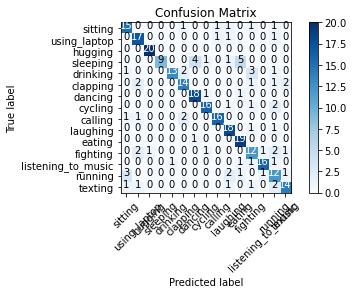

In [39]:
cm_plot_labels = ['sitting','using_laptop','hugging','sleeping','drinking','clapping','dancing','cycling','calling','laughing','eating','fighting','listening_to_music','running','texting']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [40]:
model.save_weights('kerasMobile_2048_final_model.h5')

In [41]:
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

In [42]:
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

In [43]:
TF_LITE_MODEL_FILE_NAME = "kerasMobile_2048_final_model.tflite"

In [44]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tf_lite_converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
# tf_lite_converter.optimizations = [tf.lite.Optimize.DEFAULT]
# tf_lite_converter.target_spec.supported_types = [tf.float16]
tflite_model = tf_lite_converter.convert()

INFO:tensorflow:Assets written to: C:\Users\PRASAN~1\AppData\Local\Temp\tmpt6i7zq6u\assets


INFO:tensorflow:Assets written to: C:\Users\PRASAN~1\AppData\Local\Temp\tmpt6i7zq6u\assets


In [45]:
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

4572528

In [46]:
import os
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "MB")

File size: 4.361 Megabytes
